# 2018 Thermistor array data - Array 1

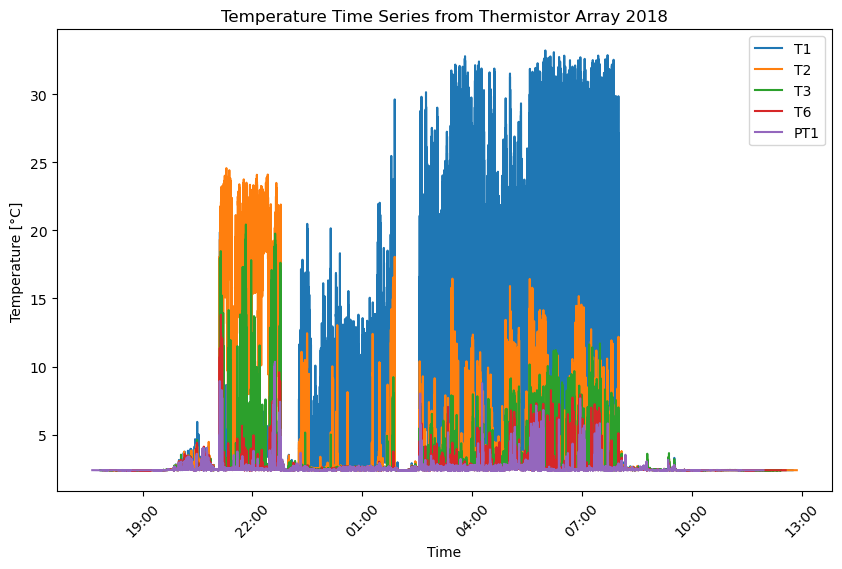

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.io import loadmat
from datetime import datetime, timedelta
%matplotlib inline

# Load .mat file
data1 = loadmat('T1_102850_20180731_1701_array1234_data.mat')
data2 = loadmat('T2_102854_20180731_1712_array1234_data.mat')
data3 = loadmat('T3_102866_20180731_1626_array1234_data.mat')
data4 = loadmat('T6_102868_20180731_1638_array1234_data.mat')
data5 = loadmat('PT1_095034_20180731_1529_array1234_data.mat')

# Access variables
variable1 = data1['thistemp']
variable2 = data1['thistime']

variable3 = data2['thistemp']
variable4 = data2['thistime']

variable5 = data3['thistemp']
variable6 = data3['thistime']

variable7 = data4['thistemp']
variable8 = data4['thistime']

variable9 = data5['thistemp']
variable10 = data5['thistime']

# Convert thistime to a numpy array and flatten it
time_values1 = np.array(variable2).flatten()
time_values2 = np.array(variable4).flatten()
time_values3 = np.array(variable6).flatten()
time_values4 = np.array(variable8).flatten()
time_values5 = np.array(variable10).flatten()

# Generate a colormap based on the time values
colors = np.arange(len(time_values1))

# Convert MATLAB date numbers to datetime objects
def matlab_to_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days=366)

# Convert and clip data for each dataset
def convert_and_clip(time_values, variable, start_ratio, end_ratio):
    time_objects = [matlab_to_datetime(matlab_datenum) for matlab_datenum in time_values]
    start_index = int(start_ratio * len(time_objects))
    end_index = int(end_ratio * len(time_objects))
    return time_objects[start_index:end_index], variable[start_index:end_index]

# Convert and clip data
time_values1, variable1 = convert_and_clip(time_values1, variable1, 0.32, 0.57)
time_values2, variable3 = convert_and_clip(time_values2, variable3, 0.32, 0.57)
time_values3, variable5 = convert_and_clip(time_values3, variable5, 0.32, 0.57)
time_values4, variable7 = convert_and_clip(time_values4, variable7, 0.32, 0.57)
time_values5, variable9 = convert_and_clip(time_values5, variable9, 0.32, 0.57)

# Plot the time series
plt.figure(figsize=(10, 6))

# Plot data1
plt.plot(time_values1, variable1, label='T1')

# Plot data2
plt.plot(time_values2, variable3, label='T2')

# Plot data3
plt.plot(time_values3, variable5, label='T3')

# Plot data4
plt.plot(time_values4, variable7, label='T6')

# Plot data5
plt.plot(time_values5, variable9, label='PT1')

plt.title('Temperature Time Series from Thermistor Array 2018')
plt.xlabel('Time')
plt.ylabel('Temperature [°C]')

# Format x-axis ticks as hours:minutes
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis tick labels
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [2]:
# Calculate mean temperature for each dataset
mean_temp1 = np.mean(variable1)
mean_temp2 = np.mean(variable3)
mean_temp3 = np.mean(variable5)
mean_temp4 = np.mean(variable7)
mean_temp5 = np.mean(variable9)

# Print mean temperatures
print(f"Mean Temperature T1: {mean_temp1:.2f} °C")
print(f"Mean Temperature T2: {mean_temp2:.2f} °C")
print(f"Mean Temperature T3: {mean_temp3:.2f} °C")
print(f"Mean Temperature T6: {mean_temp4:.2f} °C")
print(f"Mean Temperature PT1: {mean_temp5:.2f} °C")


Mean Temperature T1: 7.11 °C
Mean Temperature T2: 4.09 °C
Mean Temperature T3: 2.74 °C
Mean Temperature T6: 2.53 °C
Mean Temperature PT1: 2.48 °C


### Site 1B Time Frame

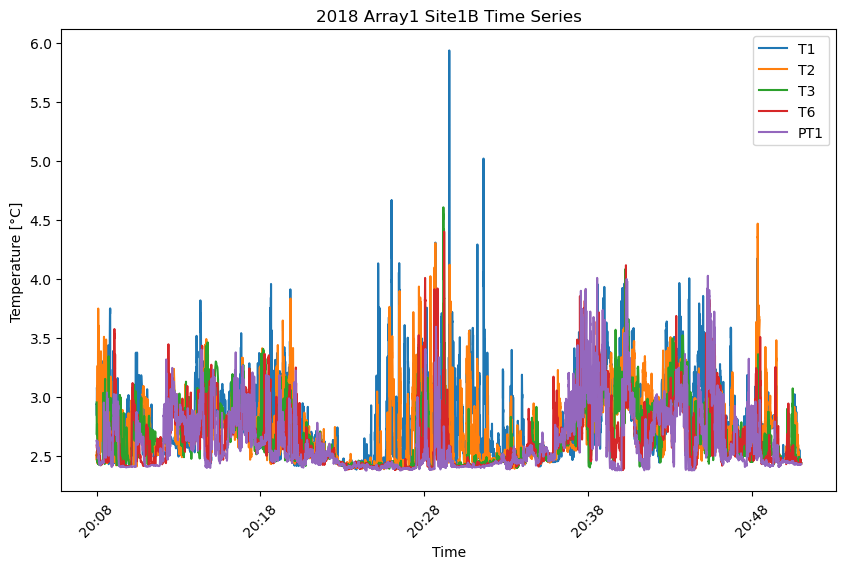

In [3]:
# Load .mat file
data1 = loadmat('T1_102850_20180731_1701_array1234_data.mat')
data2 = loadmat('T2_102854_20180731_1712_array1234_data.mat')
data3 = loadmat('T3_102866_20180731_1626_array1234_data.mat')
data4 = loadmat('T6_102868_20180731_1638_array1234_data.mat')
data5 = loadmat('PT1_095034_20180731_1529_array1234_data.mat')

# Access variables
variableB1 = data1['thistemp']
variableB2 = data1['thistime']

variableB3 = data2['thistemp']
variableB4 = data2['thistime']

variableB5 = data3['thistemp']
variableB6 = data3['thistime']

variableB7 = data4['thistemp']
variableB8 = data4['thistime']

variableB9 = data5['thistemp']
variableB10 = data5['thistime']

# Convert thistime to a numpy array and flatten it
time_values1 = np.array(variableB2).flatten()
time_values2 = np.array(variableB4).flatten()
time_values3 = np.array(variableB6).flatten()
time_values4 = np.array(variableB8).flatten()
time_values5 = np.array(variableB10).flatten()

# Generate a colormap based on the time values
colors = np.arange(len(time_values1))

# Convert MATLAB date numbers to datetime objects
def matlab_to_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days=366)

# Convert and clip data for each dataset with specific start and end times
def convert_and_clip_with_times(time_values, variable, start_time, end_time):
    time_objects = [matlab_to_datetime(matlab_datenum) for matlab_datenum in time_values]
    start_index = next(i for i, t in enumerate(time_objects) if t >= start_time)
    end_index = next(i for i, t in enumerate(time_objects) if t >= end_time)
    return time_objects[start_index:end_index], variable[start_index:end_index]

# Define the start and end times for the desired time frame
start_time = datetime(2018, 7, 29, 20, 8)  # Example start time
end_time = datetime(2018, 7, 29, 20, 51)    # Example end time

# Convert and clip data
time_values1, variableB1 = convert_and_clip_with_times(time_values1, variableB1, start_time, end_time)
time_values2, variableB3 = convert_and_clip_with_times(time_values2, variableB3, start_time, end_time)
time_values3, variableB5 = convert_and_clip_with_times(time_values3, variableB5, start_time, end_time)
time_values4, variableB7 = convert_and_clip_with_times(time_values4, variableB7, start_time, end_time)
time_values5, variableB9 = convert_and_clip_with_times(time_values5, variableB9, start_time, end_time)

# Plot the time series
plt.figure(figsize=(10, 6))

# Plot data1
plt.plot(time_values1, variableB1, label='T1')

# Plot data2
plt.plot(time_values2, variableB3, label='T2')

# Plot data3
plt.plot(time_values3, variableB5, label='T3')

# Plot data4
plt.plot(time_values4, variableB7, label='T6')

# Plot data5
plt.plot(time_values5, variableB9, label='PT1')

plt.title('2018 Array1 Site1B Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature [°C]')

# Format x-axis ticks as hours:minutes
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))  # Example interval
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis tick labels
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [4]:
# Calculate mean temperature for each dataset
mean_temp1 = np.mean(variableB1)
mean_temp2 = np.mean(variableB3)
mean_temp3 = np.mean(variableB5)
mean_temp4 = np.mean(variableB7)
mean_temp5 = np.mean(variableB9)

# Print mean temperatures
print(f"Mean Temperature T1: {mean_temp1:.2f} °C")
print(f"Mean Temperature T2: {mean_temp2:.2f} °C")
print(f"Mean Temperature T3: {mean_temp3:.2f} °C")
print(f"Mean Temperature T6: {mean_temp4:.2f} °C")
print(f"Mean Temperature PT1: {mean_temp5:.2f} °C")

Mean Temperature T1: 2.80 °C
Mean Temperature T2: 2.74 °C
Mean Temperature T3: 2.68 °C
Mean Temperature T6: 2.65 °C
Mean Temperature PT1: 2.62 °C


In [5]:
# Calculate max temperature for each dataset
max_temp1 = np.max(variableB1)
max_temp2 = np.max(variableB3)
max_temp3 = np.max(variableB5)
max_temp4 = np.max(variableB7)
max_temp5 = np.max(variableB9)

# Print max temperatures
print(f"Max Temperature T1: {max_temp1:.2f} °C")
print(f"Max Temperature T2: {max_temp2:.2f} °C")
print(f"Max Temperature T3: {max_temp3:.2f} °C")
print(f"Max Temperature T6: {max_temp4:.2f} °C")
print(f"Max Temperature PT1: {max_temp5:.2f} °C")

Max Temperature T1: 5.94 °C
Max Temperature T2: 4.47 °C
Max Temperature T3: 4.61 °C
Max Temperature T6: 4.40 °C
Max Temperature PT1: 4.03 °C


### Site 1D Time Frame

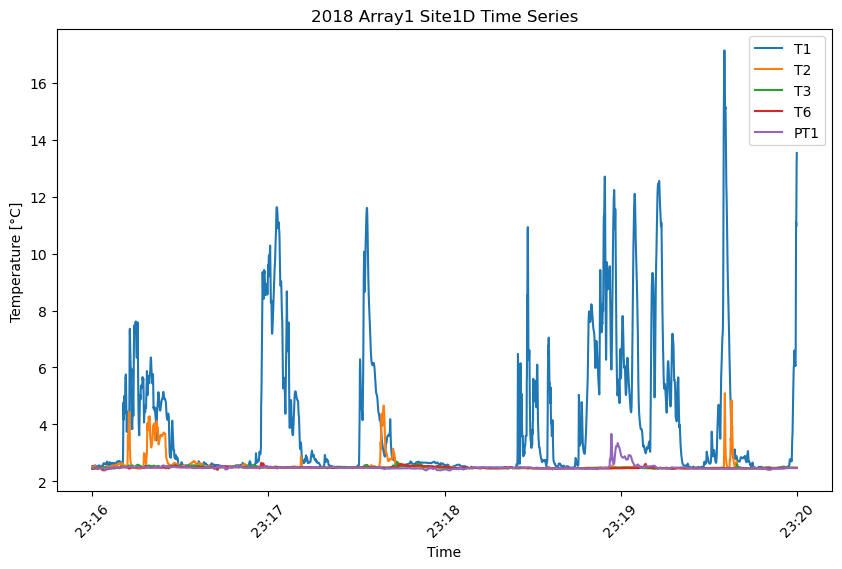

In [6]:
# Load .mat file
data1 = loadmat('T1_102850_20180731_1701_array1234_data.mat')
data2 = loadmat('T2_102854_20180731_1712_array1234_data.mat')
data3 = loadmat('T3_102866_20180731_1626_array1234_data.mat')
data4 = loadmat('T6_102868_20180731_1638_array1234_data.mat')
data5 = loadmat('PT1_095034_20180731_1529_array1234_data.mat')

# Access variables
variableD1 = data1['thistemp']
variableD2 = data1['thistime']

variableD3 = data2['thistemp']
variableD4 = data2['thistime']

variableD5 = data3['thistemp']
variableD6 = data3['thistime']

variableD7 = data4['thistemp']
variableD8 = data4['thistime']

variableD9 = data5['thistemp']
variableD10 = data5['thistime']

# Convert thistime to a numpy array and flatten it
time_values1 = np.array(variableD2).flatten()
time_values2 = np.array(variableD4).flatten()
time_values3 = np.array(variableD6).flatten()
time_values4 = np.array(variableD8).flatten()
time_values5 = np.array(variableD10).flatten()

# Generate a colormap based on the time values
colors = np.arange(len(time_values1))

# Convert MATLAB date numbers to datetime objects
def matlab_to_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days=366)

# Convert and clip data for each dataset with specific start and end times
def convert_and_clip_with_times(time_values, variable, start_time, end_time):
    time_objects = [matlab_to_datetime(matlab_datenum) for matlab_datenum in time_values]
    start_index = next(i for i, t in enumerate(time_objects) if t >= start_time)
    end_index = next(i for i, t in enumerate(time_objects) if t >= end_time)
    return time_objects[start_index:end_index], variable[start_index:end_index]

# Define the start and end times for the desired time frame
start_time = datetime(2018, 7, 29, 23, 16)  # Example start time
end_time = datetime(2018, 7, 29, 23, 20)    # Example end time

# Convert and clip data
time_values1, variableD1 = convert_and_clip_with_times(time_values1, variableD1, start_time, end_time)
time_values2, variableD3 = convert_and_clip_with_times(time_values2, variableD3, start_time, end_time)
time_values3, variableD5 = convert_and_clip_with_times(time_values3, variableD5, start_time, end_time)
time_values4, variableD7 = convert_and_clip_with_times(time_values4, variableD7, start_time, end_time)
time_values5, variableD9 = convert_and_clip_with_times(time_values5, variableD9, start_time, end_time)

# Plot the time series
plt.figure(figsize=(10, 6))

# Plot data1
plt.plot(time_values1, variableD1, label='T1')

# Plot data2
plt.plot(time_values2, variableD3, label='T2')

# Plot data3
plt.plot(time_values3, variableD5, label='T3')

# Plot data4
plt.plot(time_values4, variableD7, label='T6')

# Plot data5
plt.plot(time_values5, variableD9, label='PT1')

plt.title('2018 Array1 Site1D Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature [°C]')

# Format x-axis ticks as hours:minutes
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis tick labels
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [7]:
# Calculate mean temperature for each dataset
mean_temp1 = np.mean(variableD1)
mean_temp2 = np.mean(variableD3)
mean_temp3 = np.mean(variableD5)
mean_temp4 = np.mean(variableD7)
mean_temp5 = np.mean(variableD9)

# Print mean temperatures
print(f"Mean Temperature T1: {mean_temp1:.2f} °C")
print(f"Mean Temperature T2: {mean_temp2:.2f} °C")
print(f"Mean Temperature T3: {mean_temp3:.2f} °C")
print(f"Mean Temperature T6: {mean_temp4:.2f} °C")
print(f"Mean Temperature PT1: {mean_temp5:.2f} °C")

Mean Temperature T1: 3.96 °C
Mean Temperature T2: 2.55 °C
Mean Temperature T3: 2.48 °C
Mean Temperature T6: 2.47 °C
Mean Temperature PT1: 2.48 °C


In [8]:
# Calculate max temperature for each dataset
max_temp1 = np.max(variableD1)
max_temp2 = np.max(variableD3)
max_temp3 = np.max(variableD5)
max_temp4 = np.max(variableD7)
max_temp5 = np.max(variableD9)

# Print max temperatures
print(f"Max Temperature T1: {max_temp1:.2f} °C")
print(f"Max Temperature T2: {max_temp2:.2f} °C")
print(f"Max Temperature T3: {max_temp3:.2f} °C")
print(f"Max Temperature T6: {max_temp4:.2f} °C")
print(f"Max Temperature PT1: {max_temp5:.2f} °C")

Max Temperature T1: 17.15 °C
Max Temperature T2: 5.10 °C
Max Temperature T3: 2.67 °C
Max Temperature T6: 2.65 °C
Max Temperature PT1: 3.66 °C


## Thermistor Array Data 2

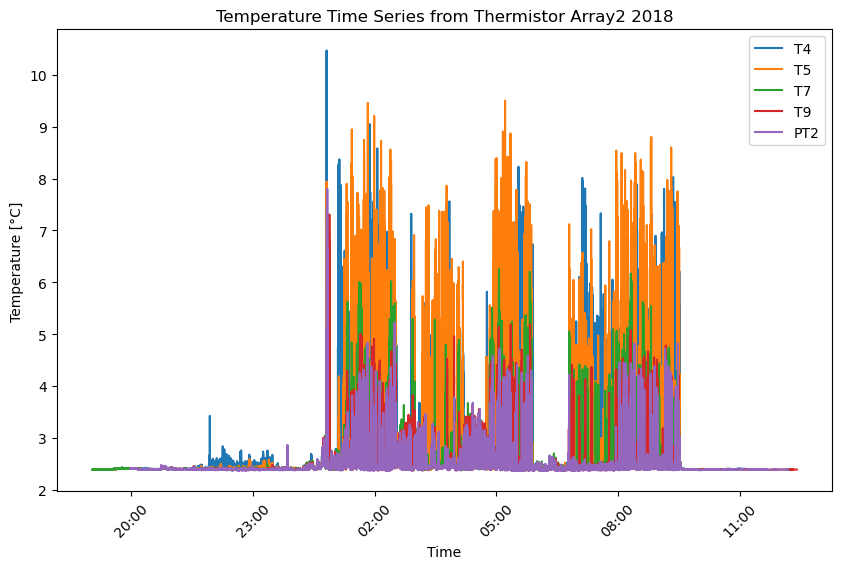

In [9]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.io import loadmat
from datetime import datetime, timedelta
%matplotlib inline

# Load .mat file
data1 = loadmat('T4_102856_20180731_1412_array1234_data.mat')
data2 = loadmat('T5_102852_20180731_1422_array1234_data.mat')
data3 = loadmat('T7_102869_20180731_1325_array1234_data.mat')
data4 = loadmat('T9_102863_20180731_1615_array1234_data.mat')
data5 = loadmat('PT2_095035_20180731_1553_array1234_data.mat')

# Access variables
variable1 = data1['thistemp']
variable2 = data1['thistime']

variable3 = data2['thistemp']
variable4 = data2['thistime']

variable5 = data3['thistemp']
variable6 = data3['thistime']

variable7 = data4['thistemp']
variable8 = data4['thistime']

variable9 = data5['thistemp']
variable10 = data5['thistime']

# Convert thistime to a numpy array and flatten it
time_values1 = np.array(variable2).flatten()
time_values2 = np.array(variable4).flatten()
time_values3 = np.array(variable6).flatten()
time_values4 = np.array(variable8).flatten()
time_values5 = np.array(variable10).flatten()

# Generate a colormap based on the time values
colors = np.arange(len(time_values1))

# Convert MATLAB date numbers to datetime objects
def matlab_to_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days=366)

# Convert and clip data for each dataset
def convert_and_clip(time_values, variable, start_ratio, end_ratio):
    time_objects = [matlab_to_datetime(matlab_datenum) for matlab_datenum in time_values]
    start_index = int(start_ratio * len(time_objects))
    end_index = int(end_ratio * len(time_objects))
    return time_objects[start_index:end_index], variable[start_index:end_index]

# Convert and clip data
time_values1, variable1 = convert_and_clip(time_values1, variable1, 0.35, 0.57)
time_values2, variable3 = convert_and_clip(time_values2, variable3, 0.35, 0.57)
time_values3, variable5 = convert_and_clip(time_values3, variable5, 0.35, 0.57)
time_values4, variable7 = convert_and_clip(time_values4, variable7, 0.35, 0.57)
time_values5, variable9 = convert_and_clip(time_values5, variable9, 0.35, 0.57)

# Plot the time series
plt.figure(figsize=(10, 6))

# Plot data1
plt.plot(time_values1, variable1, label='T4')

# Plot data2
plt.plot(time_values2, variable3, label='T5')

# Plot data3
plt.plot(time_values3, variable5, label='T7')

# Plot data4
plt.plot(time_values4, variable7, label='T9')

# Plot data5
plt.plot(time_values5, variable9, label='PT2')

plt.title('Temperature Time Series from Thermistor Array2 2018')
plt.xlabel('Time')
plt.ylabel('Temperature [°C]')

# Format x-axis ticks as hours:minutes
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=3))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis tick labels
plt.xticks(rotation=45)

plt.legend()
plt.show()

In [10]:
# Calculate mean temperature for each dataset
mean_temp1 = np.mean(variable1)
mean_temp2 = np.mean(variable3)
mean_temp3 = np.mean(variable5)
mean_temp4 = np.mean(variable7)
mean_temp5 = np.mean(variable9)

# Print mean temperatures
print(f"Mean Temperature T4: {mean_temp1:.2f} °C")
print(f"Mean Temperature T5: {mean_temp2:.2f} °C")
print(f"Mean Temperature T7: {mean_temp3:.2f} °C")
print(f"Mean Temperature T9: {mean_temp4:.2f} °C")
print(f"Mean Temperature PT2: {mean_temp5:.2f} °C")

Mean Temperature T4: 2.83 °C
Mean Temperature T5: 2.65 °C
Mean Temperature T7: 2.52 °C
Mean Temperature T9: 2.49 °C
Mean Temperature PT2: 2.46 °C


### 1F Site Time Frame

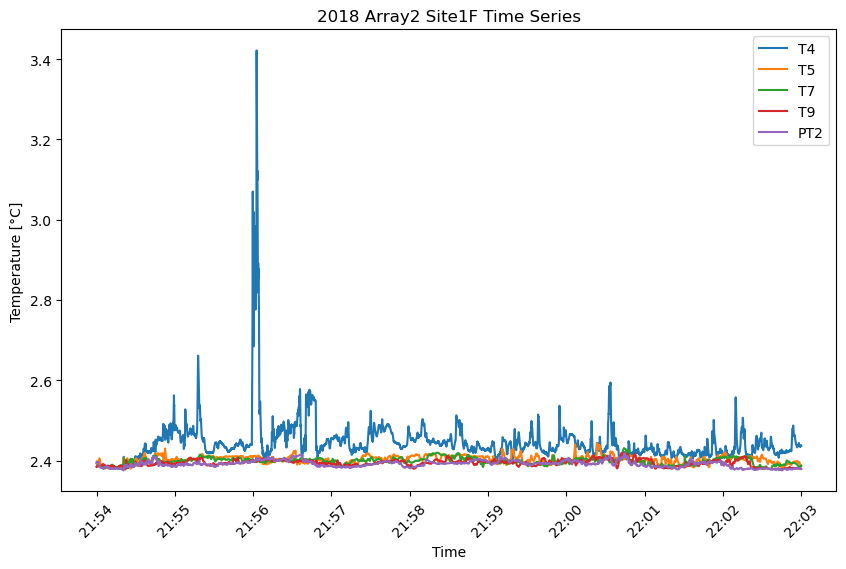

In [11]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.io import loadmat
from datetime import datetime, timedelta
%matplotlib inline

# Load .mat file
data1 = loadmat('T4_102856_20180731_1412_array1234_data.mat')
data2 = loadmat('T5_102852_20180731_1422_array1234_data.mat')
data3 = loadmat('T7_102869_20180731_1325_array1234_data.mat')
data4 = loadmat('T9_102863_20180731_1615_array1234_data.mat')
data5 = loadmat('PT2_095035_20180731_1553_array1234_data.mat')

# Access variables
variableF1 = data1['thistemp']
variableF2 = data1['thistime']

variableF3 = data2['thistemp']
variableF4 = data2['thistime']

variableF5 = data3['thistemp']
variableF6 = data3['thistime']

variableF7 = data4['thistemp']
variableF8 = data4['thistime']

variableF9 = data5['thistemp']
variableF10 = data5['thistime']

# Convert thistime to a numpy array and flatten it
time_values1 = np.array(variableF2).flatten()
time_values2 = np.array(variableF4).flatten()
time_values3 = np.array(variableF6).flatten()
time_values4 = np.array(variableF8).flatten()
time_values5 = np.array(variableF10).flatten()

# Generate a colormap based on the time values
colors = np.arange(len(time_values1))

# Convert MATLAB date numbers to datetime objects
def matlab_to_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days=366)

# Convert and clip data for each dataset with specific start and end times
def convert_and_clip_with_times(time_values, variable, start_time, end_time):
    time_objects = [matlab_to_datetime(matlab_datenum) for matlab_datenum in time_values]
    start_index = next(i for i, t in enumerate(time_objects) if t >= start_time)
    end_index = next(i for i, t in enumerate(time_objects) if t >= end_time)
    return time_objects[start_index:end_index], variable[start_index:end_index]

# Define the start and end times for each dataset
start_time1 = datetime(2018, 7, 29, 21, 54)  # Example start time
end_time1 = datetime(2018, 7, 29, 22, 3)    # Example end time

# Convert and clip data
time_values1, variableF1 = convert_and_clip_with_times(time_values1, variableF1, start_time1, end_time1)
time_values2, variableF3 = convert_and_clip_with_times(time_values2, variableF3, start_time1, end_time1)
time_values3, variableF5 = convert_and_clip_with_times(time_values3, variableF5, start_time1, end_time1)
time_values4, variableF7 = convert_and_clip_with_times(time_values4, variableF7, start_time1, end_time1)
time_values5, variableF9 = convert_and_clip_with_times(time_values5, variableF9, start_time1, end_time1)

# Plot the time series
plt.figure(figsize=(10, 6))

# Plot data1
plt.plot(time_values1, variableF1, label='T4')

# Plot data2
plt.plot(time_values2, variableF3, label='T5')

# Plot data3
plt.plot(time_values3, variableF5, label='T7')

# Plot data4
plt.plot(time_values4, variableF7, label='T9')

# Plot data5
plt.plot(time_values5, variableF9, label='PT2')

plt.title('2018 Array2 Site1F Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature [°C]')

# Format x-axis ticks as hours:minutes
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis tick labels
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [12]:
# Calculate mean temperature for each dataset
mean_temp1 = np.mean(variableF1)
mean_temp2 = np.mean(variableF3)
mean_temp3 = np.mean(variableF5)
mean_temp4 = np.mean(variableF7)
mean_temp5 = np.mean(variableF9)

# Print mean temperatures
print(f"Mean Temperature T4: {mean_temp1:.2f} °C")
print(f"Mean Temperature T5: {mean_temp2:.2f} °C")
print(f"Mean Temperature T7: {mean_temp3:.2f} °C")
print(f"Mean Temperature T9: {mean_temp4:.2f} °C")
print(f"Mean Temperature PT2: {mean_temp5:.2f} °C")

Mean Temperature T4: 2.45 °C
Mean Temperature T5: 2.40 °C
Mean Temperature T7: 2.40 °C
Mean Temperature T9: 2.39 °C
Mean Temperature PT2: 2.39 °C


In [13]:
# Calculate max temperature for each dataset
max_temp1 = np.max(variableF1)
max_temp2 = np.max(variableF3)
max_temp3 = np.max(variableF5)
max_temp4 = np.max(variableF7)
max_temp5 = np.max(variableF9)

# Print mean temperatures
print(f"Max Temperature T4: {max_temp1:.2f} °C")
print(f"Max Temperature T5: {max_temp2:.2f} °C")
print(f"Max Temperature T7: {max_temp3:.2f} °C")
print(f"Max Temperature T9: {max_temp4:.2f} °C")
print(f"Max Temperature PT2: {max_temp5:.2f} °C")

Max Temperature T4: 3.42 °C
Max Temperature T5: 2.44 °C
Max Temperature T7: 2.43 °C
Max Temperature T9: 2.42 °C
Max Temperature PT2: 2.42 °C


### 2G Site Time Frame

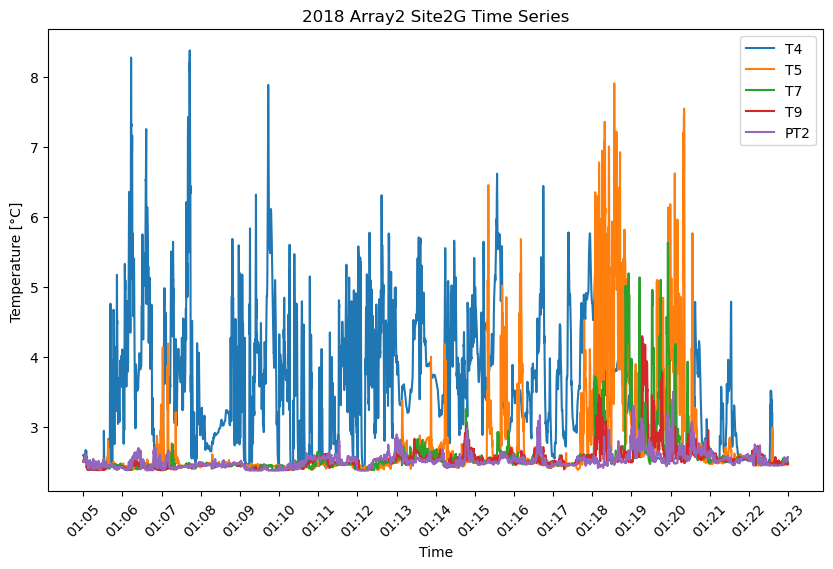

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.io import loadmat
from datetime import datetime, timedelta
%matplotlib inline

# Load .mat file
data1 = loadmat('T4_102856_20180731_1412_array1234_data.mat')
data2 = loadmat('T5_102852_20180731_1422_array1234_data.mat')
data3 = loadmat('T7_102869_20180731_1325_array1234_data.mat')
data4 = loadmat('T9_102863_20180731_1615_array1234_data.mat')
data5 = loadmat('PT2_095035_20180731_1553_array1234_data.mat')

# Access variables
variableG1 = data1['thistemp']
variableG2 = data1['thistime']

variableG3 = data2['thistemp']
variableG4 = data2['thistime']

variableG5 = data3['thistemp']
variableG6 = data3['thistime']

variableG7 = data4['thistemp']
variableG8 = data4['thistime']

variableG9 = data5['thistemp']
variableG10 = data5['thistime']

# Convert thistime to a numpy array and flatten it
time_values1 = np.array(variableG2).flatten()
time_values2 = np.array(variableG4).flatten()
time_values3 = np.array(variableG6).flatten()
time_values4 = np.array(variableG8).flatten()
time_values5 = np.array(variableG10).flatten()

# Generate a colormap based on the time values
colors = np.arange(len(time_values1))

# Convert MATLAB date numbers to datetime objects
def matlab_to_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days=366)

# Convert and clip data for each dataset with specific start and end times
def convert_and_clip_with_times(time_values, variable, start_time, end_time):
    time_objects = [matlab_to_datetime(matlab_datenum) for matlab_datenum in time_values]
    start_index = next(i for i, t in enumerate(time_objects) if t >= start_time)
    end_index = next(i for i, t in enumerate(time_objects) if t >= end_time)
    return time_objects[start_index:end_index], variable[start_index:end_index]

# Define the start and end times for each dataset
start_time1 = datetime(2018, 7, 30, 1, 5)  # Example start time
end_time1 = datetime(2018, 7, 30, 1, 23)    # Example end time

# Convert and clip data
time_values1, variableG1 = convert_and_clip_with_times(time_values1, variableG1, start_time1, end_time1)
time_values2, variableG3 = convert_and_clip_with_times(time_values2, variableG3, start_time1, end_time1)
time_values3, variableG5 = convert_and_clip_with_times(time_values3, variableG5, start_time1, end_time1)
time_values4, variableG7 = convert_and_clip_with_times(time_values4, variableG7, start_time1, end_time1)
time_values5, variableG9 = convert_and_clip_with_times(time_values5, variableG9, start_time1, end_time1)

# Plot the time series
plt.figure(figsize=(10, 6))

# Plot data1
plt.plot(time_values1, variableG1, label='T4')

# Plot data2
plt.plot(time_values2, variableG3, label='T5')

# Plot data3
plt.plot(time_values3, variableG5, label='T7')

# Plot data4
plt.plot(time_values4, variableG7, label='T9')

# Plot data5
plt.plot(time_values5, variableG9, label='PT2')

plt.title('2018 Array2 Site2G Time Series')
plt.xlabel('Time')
plt.ylabel('Temperature [°C]')

# Format x-axis ticks as hours:minutes
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis tick labels
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [15]:
# Calculate mean temperature for each dataset
mean_temp1 = np.mean(variableG1)
mean_temp2 = np.mean(variableG3)
mean_temp3 = np.mean(variableG5)
mean_temp4 = np.mean(variableG7)
mean_temp5 = np.mean(variableG9)

# Print mean temperatures
print(f"Mean Temperature T4: {mean_temp1:.2f} °C")
print(f"Mean Temperature T5: {mean_temp2:.2f} °C")
print(f"Mean Temperature T7: {mean_temp3:.2f} °C")
print(f"Mean Temperature T9: {mean_temp4:.2f} °C")
print(f"Mean Temperature PT2: {mean_temp5:.2f} °C")

Mean Temperature T4: 3.48 °C
Mean Temperature T5: 2.74 °C
Mean Temperature T7: 2.57 °C
Mean Temperature T9: 2.53 °C
Mean Temperature PT2: 2.51 °C


In [16]:
# Calculate max temperature for each dataset
max_temp1 = np.max(variableG1)
max_temp2 = np.max(variableG3)
max_temp3 = np.max(variableG5)
max_temp4 = np.max(variableG7)
max_temp5 = np.max(variableG9)

# Print mean temperatures
print(f"Max Temperature T4: {max_temp1:.2f} °C")
print(f"Max Temperature T5: {max_temp2:.2f} °C")
print(f"Max Temperature T7: {max_temp3:.2f} °C")
print(f"Max Temperature T9: {max_temp4:.2f} °C")
print(f"Max Temperature PT2: {max_temp5:.2f} °C")

Max Temperature T4: 8.37 °C
Max Temperature T5: 7.90 °C
Max Temperature T7: 5.62 °C
Max Temperature T9: 4.29 °C
Max Temperature PT2: 3.50 °C


### Across Both Time Frames

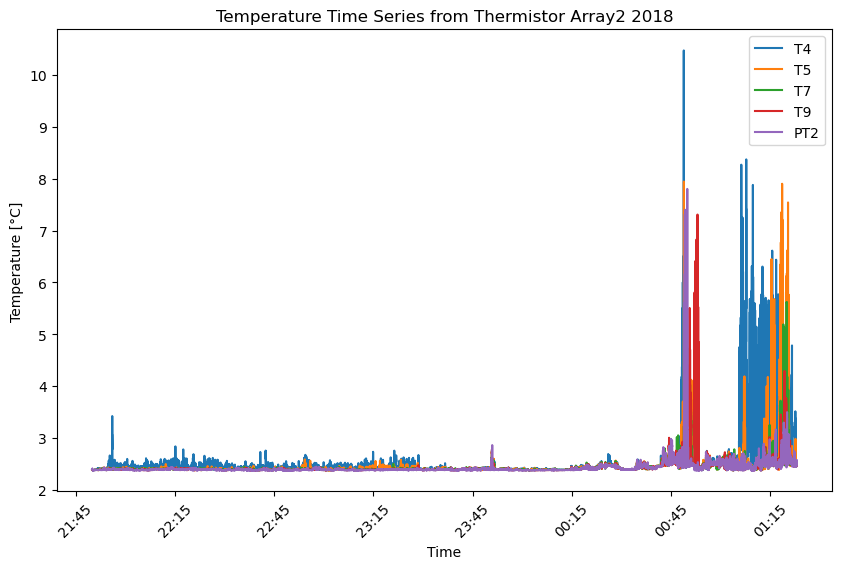

In [17]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from scipy.io import loadmat
from datetime import datetime, timedelta
%matplotlib inline

# Load .mat file
data1 = loadmat('T4_102856_20180731_1412_array1234_data.mat')
data2 = loadmat('T5_102852_20180731_1422_array1234_data.mat')
data3 = loadmat('T7_102869_20180731_1325_array1234_data.mat')
data4 = loadmat('T9_102863_20180731_1615_array1234_data.mat')
data5 = loadmat('PT2_095035_20180731_1553_array1234_data.mat')

# Access variables
variableA1 = data1['thistemp']
variableA2 = data1['thistime']

variableA3 = data2['thistemp']
variableA4 = data2['thistime']

variableA5 = data3['thistemp']
variableA6 = data3['thistime']

variableA7 = data4['thistemp']
variableA8 = data4['thistime']

variableA9 = data5['thistemp']
variableA10 = data5['thistime']

# Convert thistime to a numpy array and flatten it
time_values1 = np.array(variableA2).flatten()
time_values2 = np.array(variableA4).flatten()
time_values3 = np.array(variableA6).flatten()
time_values4 = np.array(variableA8).flatten()
time_values5 = np.array(variableA10).flatten()

# Generate a colormap based on the time values
colors = np.arange(len(time_values1))

# Convert MATLAB date numbers to datetime objects
def matlab_to_datetime(matlab_datenum):
    return datetime.fromordinal(int(matlab_datenum)) + timedelta(days=matlab_datenum%1) - timedelta(days=366)

# Convert and clip data for each dataset with specific start and end times
def convert_and_clip_with_times(time_values, variable, start_time, end_time):
    time_objects = [matlab_to_datetime(matlab_datenum) for matlab_datenum in time_values]
    start_index = next(i for i, t in enumerate(time_objects) if t >= start_time)
    end_index = next(i for i, t in enumerate(time_objects) if t >= end_time)
    return time_objects[start_index:end_index], variable[start_index:end_index]

# Define the start and end times for each dataset
start_time1 = datetime(2018, 7, 29, 21, 50)  # Example start time
end_time1 = datetime(2018, 7, 30, 1, 23)    # Example end time

# Convert and clip data
time_values1, variableA1 = convert_and_clip_with_times(time_values1, variableA1, start_time1, end_time1)
time_values2, variableA3 = convert_and_clip_with_times(time_values2, variableA3, start_time1, end_time1)
time_values3, variableA5 = convert_and_clip_with_times(time_values3, variableA5, start_time1, end_time1)
time_values4, variableA7 = convert_and_clip_with_times(time_values4, variableA7, start_time1, end_time1)
time_values5, variableA9 = convert_and_clip_with_times(time_values5, variableA9, start_time1, end_time1)

# Plot the time series
plt.figure(figsize=(10, 6))

# Plot data1
plt.plot(time_values1, variableA1, label='T4')

# Plot data2
plt.plot(time_values2, variableA3, label='T5')

# Plot data3
plt.plot(time_values3, variableA5, label='T7')

# Plot data4
plt.plot(time_values4, variableA7, label='T9')

# Plot data5
plt.plot(time_values5, variableA9, label='PT2')

plt.title('Temperature Time Series from Thermistor Array2 2018')
plt.xlabel('Time')
plt.ylabel('Temperature [°C]')

# Format x-axis ticks as hours:minutes
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Rotate x-axis tick labels
plt.xticks(rotation=45)

plt.legend()
plt.show()


In [18]:
# Calculate mean temperature for each dataset
mean_temp1 = np.mean(variableA1)
mean_temp2 = np.mean(variableA3)
mean_temp3 = np.mean(variableA5)
mean_temp4 = np.mean(variableA7)
mean_temp5 = np.mean(variableA9)

# Print mean temperatures
print(f"Mean Temperature T4: {mean_temp1:.2f} °C")
print(f"Mean Temperature T5: {mean_temp2:.2f} °C")
print(f"Mean Temperature T7: {mean_temp3:.2f} °C")
print(f"Mean Temperature T9: {mean_temp4:.2f} °C")
print(f"Mean Temperature PT2: {mean_temp5:.2f} °C")

Mean Temperature T4: 2.53 °C
Mean Temperature T5: 2.45 °C
Mean Temperature T7: 2.44 °C
Mean Temperature T9: 2.43 °C
Mean Temperature PT2: 2.42 °C


## Mean Temperature Plot

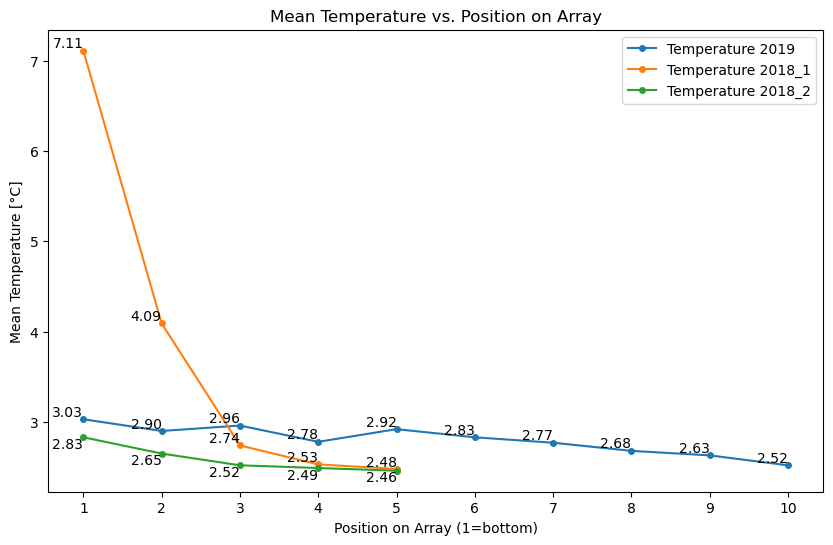

In [19]:
import matplotlib.pyplot as plt

# Create your data
data = {
    'position': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'temp1': [3.03, 2.9, 2.96, 2.78, 2.92, 2.83, 2.77, 2.68, 2.63, 2.52],
    'temp2': [7.11, 4.09, 2.74, 2.53, 2.48, None, None, None, None, None],  # Add dummy values
    'temp3': [2.83, 2.65, 2.52, 2.49, 2.46, None, None, None, None, None]  # Add dummy values
}

# Extract data
position = data['position']
temp1 = data['temp1']
temp2 = data['temp2']
temp3 = data['temp3']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(position, temp1, 'o-', label='Temperature 2019', markersize=4)
plt.plot(position, temp2, 'o-', label='Temperature 2018_1', markersize=4)
plt.plot(position, temp3, 'o-', label='Temperature 2018_2', markersize=4)

# Set x-axis ticks to show all positions
plt.xticks(position)

# Add labels for each temperature next to the corresponding point
for x, y in zip(position, temp1):
    plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

for x, y in zip(position, temp2):
    if y is not None:
        plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

for x, y in zip(position, temp3):
    if y is not None:
        plt.text(x, y, f'{y:.2f}', ha='right', va='top')

# Add labels and title
plt.xlabel('Position on Array (1=bottom)')
plt.ylabel('Mean Temperature [°C]')
plt.title('Mean Temperature vs. Position on Array')
plt.legend()

# Show the plot
plt.show()


### 2018 Mean Temperature

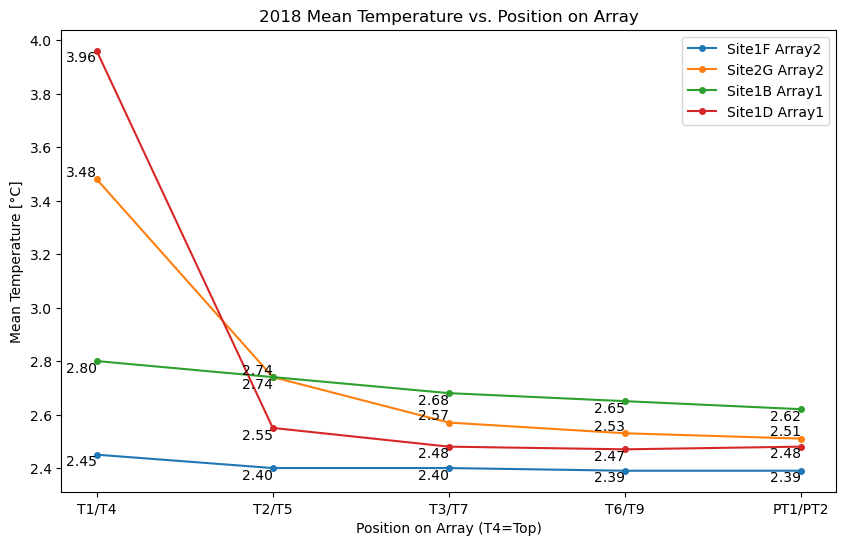

In [20]:
import matplotlib.pyplot as plt

# Create your data
data = {
    'position': ['T1/T4', 'T2/T5', 'T3/T7', 'T6/T9', 'PT1/PT2'],
    '1F': [2.45, 2.40, 2.40, 2.39, 2.39],
    '2G': [3.48, 2.74, 2.57, 2.53, 2.51],
    '1B': [2.80, 2.74, 2.68, 2.65, 2.62],
    '1D': [3.96, 2.55, 2.48, 2.47, 2.48]
}

# Extract data
position = data['position']
temp1 = data['1F']
temp2 = data['2G']
temp3 = data['1B']
temp4 = data['1D']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(position, temp1, 'o-', label='Site1F Array2', markersize=4)
plt.plot(position, temp2, 'o-', label='Site2G Array2', markersize=4)
plt.plot(position, temp3, 'o-', label='Site1B Array1', markersize=4)
plt.plot(position, temp4, 'o-', label='Site1D Array1', markersize=4)

# Set x-axis ticks to show all positions
plt.xticks(position)

# Add labels for each temperature next to the corresponding point
for x, y in zip(position, temp1):
    plt.text(x, y, f'{y:.2f}', ha='right', va='top')

for x, y in zip(position, temp2):
    if y is not None:
        plt.text(x, y, f'{y:.2f}', ha='right', va='bottom')

for x, y in zip(position, temp3):
    if y is not None:
        plt.text(x, y, f'{y:.2f}', ha='right', va='top')

for x, y in zip(position, temp4):
    if y is not None:
        plt.text(x, y, f'{y:.2f}', ha='right', va='top')

# Add labels and title
plt.xlabel('Position on Array (T4=Top)')
plt.ylabel('Mean Temperature [°C]')
plt.title('2018 Mean Temperature vs. Position on Array')
plt.legend()

# Show the plot
plt.show()


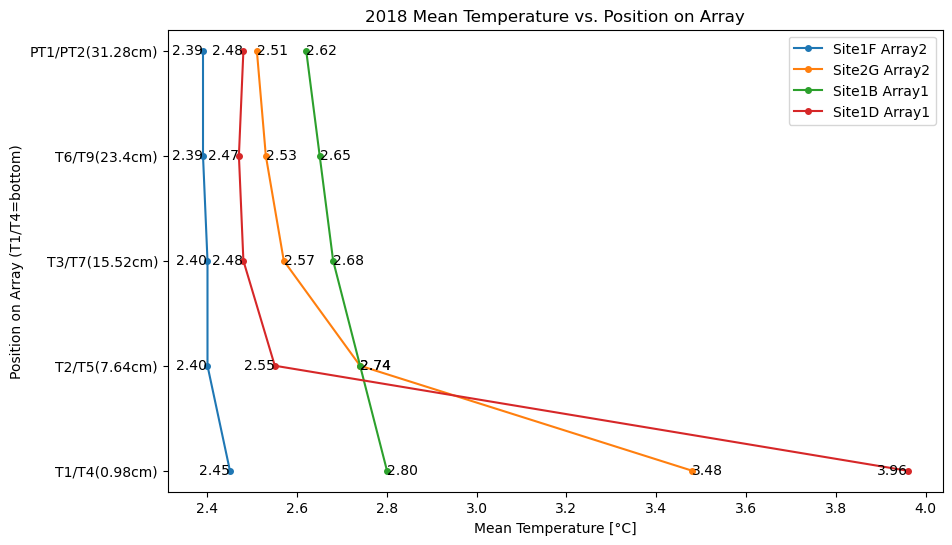

In [21]:
import matplotlib.pyplot as plt

# Create your data
data = {
    'position': ['T1/T4(0.98cm)', 'T2/T5(7.64cm)', 'T3/T7(15.52cm)', 'T6/T9(23.4cm)', 'PT1/PT2(31.28cm)'],
    '1F': [2.45, 2.40, 2.40, 2.39, 2.39],
    '2G': [3.48, 2.74, 2.57, 2.53, 2.51],
    '1B': [2.80, 2.74, 2.68, 2.65, 2.62],
    '1D': [3.96, 2.55, 2.48, 2.47, 2.48]
}

# Extract data
position = data['position']
temp1 = data['1F']
temp2 = data['2G']
temp3 = data['1B']
temp4 = data['1D']

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(temp1, position, 'o-', label='Site1F Array2', markersize=4)
plt.plot(temp2, position, 'o-', label='Site2G Array2', markersize=4)
plt.plot(temp3, position, 'o-', label='Site1B Array1', markersize=4)
plt.plot(temp4, position, 'o-', label='Site1D Array1', markersize=4)

# Set y-axis ticks to show all positions
plt.yticks(position)

# Add labels for each temperature next to the corresponding point
for y, x in zip(position, temp1):
    plt.text(x, y, f'{x:.2f}', ha='right', va='center')

for y, x in zip(position, temp2):
    if x is not None:
        plt.text(x, y, f'{x:.2f}', ha='left', va='center')

for y, x in zip(position, temp3):
    if x is not None:
        plt.text(x, y, f'{x:.2f}', ha='left', va='center')

for y, x in zip(position, temp4):
    if x is not None:
        plt.text(x, y, f'{x:.2f}', ha='right', va='center')

# Add labels and title
plt.xlabel('Mean Temperature [°C]')
plt.ylabel('Position on Array (T1/T4=bottom)')
plt.title('2018 Mean Temperature vs. Position on Array')
plt.legend()

# Show the plot
plt.show()


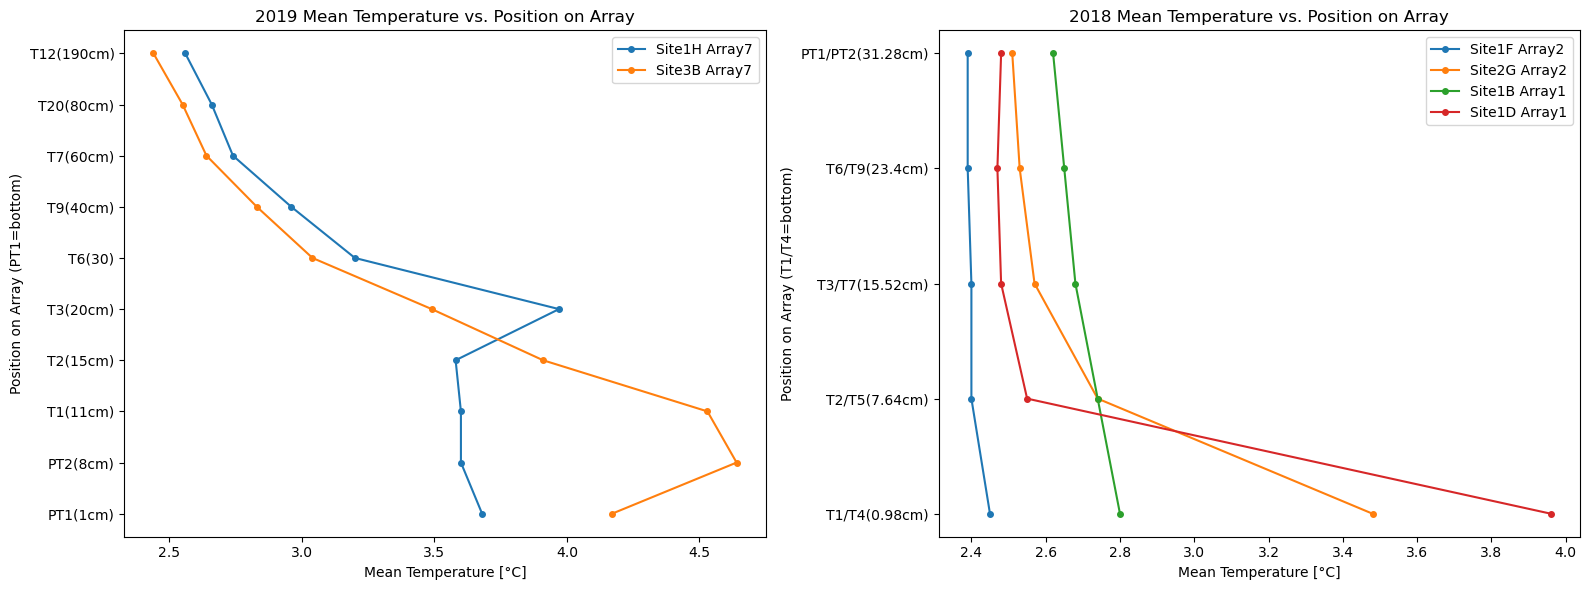

In [22]:
import matplotlib.pyplot as plt

# Create your data for 2019
data_2019 = {
    'position': ['PT1(1cm)', 'PT2(8cm)','T1(11cm)', 'T2(15cm)', 'T3(20cm)', 'T6(30)', 'T9(40cm)', 'T7(60cm)', 'T20(80cm)', 'T12(190cm)'],
    '1H': [3.68, 3.6, 3.6, 3.58, 3.97, 3.2, 2.96, 2.74, 2.66, 2.56],
    '3B': [4.17, 4.64, 4.53, 3.91, 3.49, 3.04, 2.83, 2.64, 2.55, 2.44]
}

# Extract data for 2019
position_2019 = data_2019['position']
temp1_2019 = data_2019['1H']
temp2_2019 = data_2019['3B']

# Create your data for 2018
data_2018 = {
    'position': ['T1/T4(0.98cm)', 'T2/T5(7.64cm)', 'T3/T7(15.52cm)', 'T6/T9(23.4cm)', 'PT1/PT2(31.28cm)'],
    '1F': [2.45, 2.40, 2.40, 2.39, 2.39],
    '2G': [3.48, 2.74, 2.57, 2.53, 2.51],
    '1B': [2.80, 2.74, 2.68, 2.65, 2.62],
    '1D': [3.96, 2.55, 2.48, 2.47, 2.48]
}

# Extract data for 2018
position_2018 = data_2018['position']
temp1_2018 = data_2018['1F']
temp2_2018 = data_2018['2G']
temp3_2018 = data_2018['1B']
temp4_2018 = data_2018['1D']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the data for 2019
axs[0].plot(temp1_2019, position_2019, 'o-', label='Site1H Array7', markersize=4)
axs[0].plot(temp2_2019, position_2019, 'o-', label='Site3B Array7', markersize=4)
axs[0].set_yticks(position_2019)
axs[0].set_xlabel('Mean Temperature [°C]')
axs[0].set_ylabel('Position on Array (PT1=bottom)')
axs[0].set_title('2019 Mean Temperature vs. Position on Array')
axs[0].legend()

# Plot the data for 2018
axs[1].plot(temp1_2018, position_2018, 'o-', label='Site1F Array2', markersize=4)
axs[1].plot(temp2_2018, position_2018, 'o-', label='Site2G Array2', markersize=4)
axs[1].plot(temp3_2018, position_2018, 'o-', label='Site1B Array1', markersize=4)
axs[1].plot(temp4_2018, position_2018, 'o-', label='Site1D Array1', markersize=4)
axs[1].set_yticks(position_2018)
axs[1].set_xlabel('Mean Temperature [°C]')
axs[1].set_ylabel('Position on Array (T1/T4=bottom)')
axs[1].set_title('2018 Mean Temperature vs. Position on Array')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


### Max Temperatures

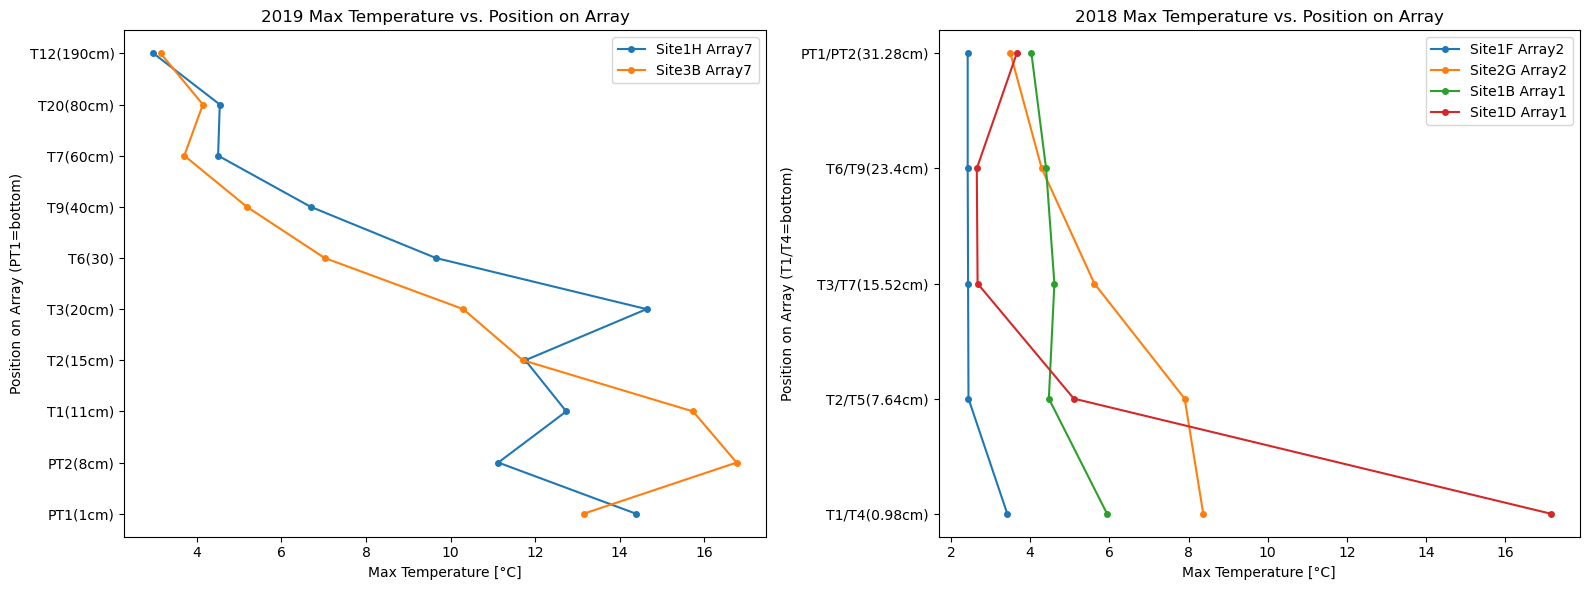

In [5]:
import matplotlib.pyplot as plt

# Create your data for 2019
data_2019 = {
    'position': ['PT1(1cm)', 'PT2(8cm)','T1(11cm)', 'T2(15cm)', 'T3(20cm)', 'T6(30)', 'T9(40cm)', 'T7(60cm)', 'T20(80cm)', 'T12(190cm)'],
    '1H': [14.39, 11.13, 12.74, 11.77, 14.64, 9.65, 6.69, 4.50, 4.54, 2.97],
    '3B': [13.15, 16.77, 15.74, 11.71, 10.30, 7.02, 5.18, 3.70, 4.14, 3.14]
}

# Extract data for 2019
position_2019 = data_2019['position']
temp1_2019 = data_2019['1H']
temp2_2019 = data_2019['3B']

# Create your data for 2018
data_2018 = {
    'position': ['T1/T4(0.98cm)', 'T2/T5(7.64cm)', 'T3/T7(15.52cm)', 'T6/T9(23.4cm)', 'PT1/PT2(31.28cm)'],
    '1F': [3.42, 2.44, 2.43, 2.42, 2.42],
    '2G': [8.37, 7.90, 5.62, 4.29, 3.50],
    '1B': [5.94, 4.47, 4.61, 4.40, 4.03],
    '1D': [17.15, 5.10, 2.67, 2.65, 3.66]
}

# Extract data for 2018
position_2018 = data_2018['position']
temp1_2018 = data_2018['1F']
temp2_2018 = data_2018['2G']
temp3_2018 = data_2018['1B']
temp4_2018 = data_2018['1D']

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot the data for 2019
axs[0].plot(temp1_2019, position_2019, 'o-', label='Site1H Array7', markersize=4)
axs[0].plot(temp2_2019, position_2019, 'o-', label='Site3B Array7', markersize=4)
axs[0].set_yticks(position_2019)
axs[0].set_xlabel('Max Temperature [°C]')
axs[0].set_ylabel('Position on Array (PT1=bottom)')
axs[0].set_title('2019 Max Temperature vs. Position on Array')
axs[0].legend()

# Plot the data for 2018
axs[1].plot(temp1_2018, position_2018, 'o-', label='Site1F Array2', markersize=4)
axs[1].plot(temp2_2018, position_2018, 'o-', label='Site2G Array2', markersize=4)
axs[1].plot(temp3_2018, position_2018, 'o-', label='Site1B Array1', markersize=4)
axs[1].plot(temp4_2018, position_2018, 'o-', label='Site1D Array1', markersize=4)
axs[1].set_yticks(position_2018)
axs[1].set_xlabel('Max Temperature [°C]')
axs[1].set_ylabel('Position on Array (T1/T4=bottom)')
axs[1].set_title('2018 Max Temperature vs. Position on Array')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
